# Universidad del Valle de Guatemala
## Security Data Science - 10
* Walter Danilo Saldaña Salguero - 19897
* Javier Alejandro Cotto Argueta - 19324

## Laboratorio 8: Defensa contra ataques a Modelos de DL

## Ataque de Evasión

Importamos librerías

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from art.estimators.classification import KerasClassifier #No soporta TF 2
from art.attacks.evasion import FastGradientMethod
from art.utils import load_dataset

# Disabling eager execution from TF 2
tf.compat.v1.disable_eager_execution()

2023-05-23 22:32:49.048813: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-23 22:32:49.434795: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-23 22:32:49.437617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 22:32:50.462395: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Modelo

In [3]:
classy_101_model = tf.keras.models.load_model("Img_Class")

2023-05-23 22:32:57.168569: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-23 22:32:57.169349: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-23 22:32:57.346756: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-05-23 22:32:57.401511: W tensorflow/c/c_api.cc:300] Operation '{name:'AssignVariableOp_3' id:177 op device:{requested: '/device:

Carga de datos

In [3]:
X_train = np.load('X_train.npy') 
x_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

Declaramos Clasificador

In [4]:
clasificador = KerasClassifier(
    model=classy_101_model)

Usamos el método del gradiente descendiente

In [5]:
attack_fgsm = FastGradientMethod(
    estimator=clasificador, 
    eps=2.7
    )

Dataset a perturbar

In [6]:
X_test = x_test/255
test_images_adv = attack_fgsm.generate(x=X_test)

/home/walt/.local/lib/python3.9/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-05-23 20:23:33.015072: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_1/Softmax' id:272 op device:{requested: '', assigned: ''} def:{{{node dense_1/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-05-23 20:23:33.223121: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
2023-05-23 20:23:33.238103: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free sy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


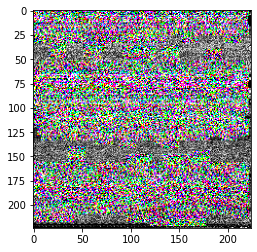

In [7]:
#Muestra de la imagen
plt.imshow(X=test_images_adv[0])

Evaluación del Módelo

In [8]:
# Evaluating the model on clean images
score_clean = classy_101_model.evaluate(
    x=X_test, 
    y=y_test
    )

# Evaluating the model on adversarial images
score_adv = classy_101_model.evaluate(
    x=test_images_adv, 
    y=y_test
    )

# Comparing test losses
print(f"Clean test set loss: {score_clean[0]:.2f} " 
      f"vs adversarial set test loss: {score_adv[0]:.2f}")

# Comparing test accuracies
print(f"Clean test set accuracy: {score_clean[1]:.2f} " 
      f"vs adversarial test set accuracy: {score_adv[1]:.2f}")

/home/walt/.local/lib/python3.9/site-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-05-23 20:24:07.915927: W tensorflow/c/c_api.cc:300] Operation '{name:'loss/mul' id:358 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_1_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Clean test set loss: 3.09 vs adversarial set test loss: 9.32
Clean test set accuracy: 0.23 vs adversarial test set accuracy: 0.12


Diferentes Pruebas

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

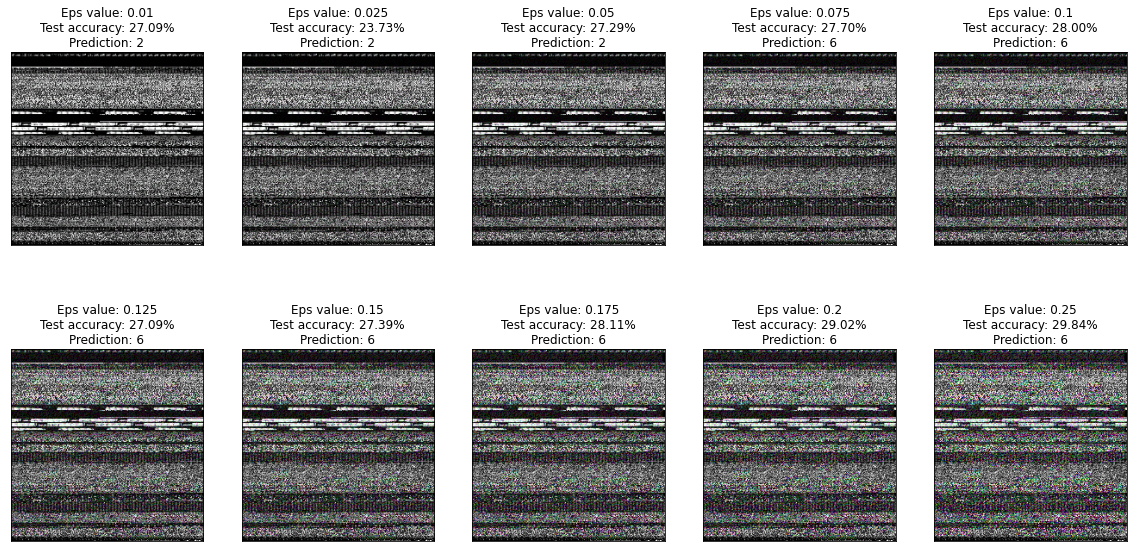

In [9]:
# Setting the number of rows and columns for the figure
nrows, ncols = 2, 5

# Generating subplots
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(20, 10)
    )

# Defining a range of eps values to try
eps_to_try = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25]

# Defining a counting variable to traverse eps_to_try
counter = 0

# Iterating over rows and cols
for i in range(nrows):
    for j in range(ncols):    
        # Creating an attack object for the current value of eps    
        attack_fgsm = FastGradientMethod(
            estimator=clasificador, 
            eps=eps_to_try[counter]
            )

        # Generating adversarial images
        test_images_adv = attack_fgsm.generate(x=X_test)

        # Showing the first adversarial image
        axes[i, j].imshow(X=test_images_adv[0])

        # Disabling x and y ticks
        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])

        # Evaluating model performance on adversarial samples and retrieving test accuracy
        test_score = clasificador._model.evaluate(
            x=test_images_adv, 
            y=y_test
            )[1]

        # Getting prediction for the image that we displayed
        prediction = np.argmax(classy_101_model.predict(
            x=np.expand_dims(a=test_images_adv[0], 
            axis=0)
            ))    

        # Showing the current eps value, test accuracy, and prediction
        axes[i, j].set_title(
            label=f"Eps value: {eps_to_try[counter]}\n"
            f"Test accuracy: {test_score * 100:.2f}%\n"
            f"Prediction: {prediction}"
            )

        # Incrementing counter
        counter += 1

# Showing the plot
plt.show()

## Defensa hacia este ataque de evasión

Importamos el "defensor" de la librearia art

In [10]:
from art.defences.preprocessor import SpatialSmoothing

Lo declaramos junto las observaciones "falsas" que vamos a utilizar

In [11]:
defence_adv = SpatialSmoothing(window_size=3)

In [12]:
x_art_def, _ = defence_adv(X_test)
x_art_adv_def, _ = defence_adv(test_images_adv)

Evaluamos el modelo contra el defensor

In [13]:
score_original = clasificador._model.evaluate(
  x=x_art_def,
  y=y_test
)

score_stolen = clasificador._model.evaluate(
  x=x_art_adv_def,
  y=y_test
)

# Comparing test losses
print(f"Original test loss: {score_original[0]:.2f} "  f"vs stolen test loss: {score_stolen[0]:.2f}")

# Comparing test accuracies
print(f"Original test accuracy: {score_original[1]:.2f} " f"vs adversarial test accuracy: {score_stolen[1]:.2f}")

Original test loss: 3.13 vs stolen test loss: 3.12
Original test accuracy: 0.17 vs adversarial test accuracy: 0.23


- Clean test set loss: 3.11 vs adversarial set test loss: 3.72
- Clean test set accuracy: 0.21 vs adversarial test set accuracy: 0.06

- Original test loss: 3.13 vs stolen test loss: 3.20
- Original test accuracy: 0.20 vs adversarial test accuracy: 0.07

Observando los resultados, podemos ver que la precisión un cambio un 5% por lo que no se altero mucho. Tambien se puede observar que con respecto la perdida si cambio bastante, un 14% se vio reducida, lo que indica que hubo menos perdida de datos. Comparando las precisiones del modelo, podemos ver que es preferible el hacer la "defensa" para obtener mejores datos habiendo ya aplicado las perturbaciones.

## Ataque de envenenamiento
Importar las librerías

In [57]:
from art.attacks.poisoning import PoisoningAttackBackdoor, PoisoningAttackCleanLabelBackdoor
from art.attacks.poisoning.perturbations import add_pattern_bd
from art.utils import to_categorical

# Defining a poisoning backdoor attack
backdoor = PoisoningAttackBackdoor(perturbation=add_pattern_bd)#Agrega un patron en los pixeles

# Defining a target label for poisoning
target = to_categorical(
    labels=np.repeat(a=5, repeats=5), 
    nb_classes=25
    )

# Inspecting the target labels
print(f"The target labels for poisoning are\n {target}")

The target labels for poisoning are
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


Cargar la data

In [58]:
x_train = np.load('X_train.npy').astype(np.float32)
x_test = np.load('X_test.npy').astype(np.float32)
y_train = np.load('y_train.npy').astype(np.float32)
y_test = np.load('y_test.npy').astype(np.float32)

Se hace un sampling de data

In [59]:
poisoned_images, poisoned_labels = backdoor.poison(
    x=x_train[:5], 
    y=target
    )

Se crea el plot de las imagenes envenenadas y de grafícan

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


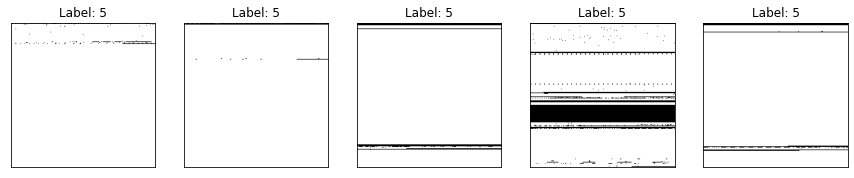

In [60]:
fig, axes = plt.subplots(
    nrows=1, 
    ncols=5, 
    squeeze=True, 
    figsize=(15, 5)
    )

for i in range(len(poisoned_images)):
    axes[i].imshow(X=poisoned_images[i])
    axes[i].set_title(label=f"Label: {np.argmax(poisoned_labels[i])}")
    axes[i].set_xticks(ticks=[])
    axes[i].set_yticks(ticks=[])    

plt.show()

Definición del objetivo a envenenar

In [61]:
target = to_categorical(
    labels=[9], 
    nb_classes=25
    )[0]

# Se debe de definir el backdoor attack
attack = PoisoningAttackCleanLabelBackdoor(
    backdoor=backdoor, 
    proxy_classifier=clasificador,#Clasificador usado para entrenar
    target=target, 
    pp_poison=0.75, #Porcentaje de imagenes a perturbar
    norm=2, 
    eps=5, 
    eps_step=0.1, 
    max_iter=200)

Una vez todo esto, se puede proceder a envenenar la data

In [ ]:
poisoned_images, poisoned_labels = attack.poison(
    x=x_train[:700], 
    y=y_train[:700]
    )

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
# Getting the indices of the images
# whose target corresponds to our backdoor target
poisoned_indices = np.all(
        a=(poisoned_labels == target), 
        axis=1
        )

# Getting a few images from the poisoned and clean dataset for comparison
sample_poisoned_images = poisoned_images[poisoned_indices][:5]
sample_clean_images = x_train[:700][poisoned_indices][:5]

# Defining a number of rows and columns for the plot
nrows, ncols = 5, 2

# Creating a figure and axes
fig, axes = plt.subplots(
        nrows=nrows, 
        ncols=ncols, 
        figsize=(10, 25)
        )

# Defining a counting variable
counter = 0

# Indicating the purpose of each column
axes[0, 0].set_title(
        label="Images from the poisoned dataset", 
        pad=25
        )
axes[0, 1].set_title(
        label="Images from the clean dataset", 
        pad=25
        )

# Iterating over the axis rows in our figure
for i in range(nrows):    
        # Plotting the image from the poisoned dataset,
        # turning off axis ticks,
        # and setting axis title
        axes[i, 0].imshow(sample_poisoned_images[counter])        
        axes[i, 0].set_xticks(ticks=[])
        axes[i, 0].set_yticks(ticks=[])
        

        # Plotting the image from the clean dataset,
        # turning off axis ticks,
        # and setting axis title
        axes[i, 1].imshow(sample_clean_images[counter])
        axes[i, 1].set_xticks(ticks=[])
        axes[i, 1].set_yticks(ticks=[])


        # Incrementing counter value
        counter += 1

# Showing the plot
plt.show()

Creamos un modelo que funcione como víctima

In [ ]:
def create_victim_model():
    # Defining the model's architecture
    model = tf.keras.models.Sequential([
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
        Conv2D(filters=32, kernel_size=3, activation="relu"),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(units=25, activation="softmax")
    ])
    
    # Compiling the model
    model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
        )

    # Returning the model
    return model

In [ ]:
model_poisoned = create_victim_model()
model_poisoned.fit(
    x=poisoned_images, 
    y=poisoned_labels, 
    epochs=10
    )

In [ ]:
#Envenenamiento al momento en la etapa de inferencia

# Getting the indices of the test images whose target 
# is different from the backdoor target
not_target = np.logical_not(np.all(
    a=y_test == target, 
    axis=1
    ))

# Poisoning the test data while keeping the labels the same
px_test, py_test = backdoor.poison(
    x=x_test[not_target], 
    y=y_test[not_target]
    )

In [ ]:
# Setting the number of rows and columns for the plot
nrows, ncols = 2, 5

# Creating a figure and axes
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(25, 10)
    )

# Defining a counting variable
counter = 0

# Iterating over rows and cols,
# plotting poisoned test images
# along with their true targets
for i in range(nrows):
    for j in range(ncols):
        axes[i, j].imshow(px_test[counter])
        axes[i, j].set_title(label=f"True label: {np.argmax(py_test[counter])}")
        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])

        # Incrementing the counter
        counter += 1

In [ ]:
# Evaluating the poisoned classifier on clean test data
scores_clean = model_poisoned.evaluate(
    x=x_test, 
    y=y_test
    )

# Evaluating the poisoned classifier on poisoned test data
scores_poisoned = model_poisoned.evaluate(
    x=px_test, 
    y=py_test
    )

# Comparing test losses
print(f"Clean test loss: {scores_clean[0]:.2f} " 
      f"vs poisoned test loss: {scores_poisoned[0]:.2f}")

# Comparing test accuracies
print(f"Clean test accuracy: {scores_clean[1]:.2f} " 
      f"vs poisoned test accuracy: {scores_poisoned[1]:.2f}")

In [ ]:
# Setting the number of rows and columns for the plot
nrows, ncols = 2, 5

# Creating a figure and axes
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(25, 10)
    )

# Getting predictions for the first ten poisoned images
poisoned_predictions = model_poisoned.predict(x=px_test[:10])

# Defining a counting variable
counter = 0

# Iterating over rows and cols,
# plotting poisoned images
# along with their predictions
for i in range(nrows):
    for j in range(ncols):
        axes[i, j].imshow(px_test[counter])
        axes[i, j].set_title(label=f"Prediction: {np.argmax(poisoned_predictions[counter])}")
        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])

        # Incrementing the counter
        counter += 1

## Defensa del envenenamiento

Para defender el modelo de un posible envenenamiento, la estratégia que se plantea es utilizar el detect_poison del ActivationDefence del art framework. Esta herramienta provee un modelo de detección de envenenamiento en el dataset para así entrenar al modelo únicamente con los datos correctos.

In [ ]:
from art.defences.detector.poison import ActivationDefence

Creamos la instancia del detector

In [ ]:
detector = ActivationDefence(clasificador, x_train, y_train)

Luego, utilizamos el detector para analizar el dataset y encontrar envenenamiento. El primer retorno es información sobre los clústers que se utilizaron para clasificar el dataset, y el segundo es una lista que contiene las predicciones del envenenamiento para cada fila del dataset

In [ ]:
cluster_data, clean_indexes = detector.detect_poison(nb_clusters=2, nb_dims=2, reduce="PCA")

El 1 representa un dato limpio, mientras que el 0 un dato envenenado, así que los contamos

In [ ]:
clean_indexes.count(0)

En este caso se predijeron 1033 datos envenenados, sin embargo, sabemos que solo se envenenaron 700 datos, por lo que podemos ver que la precisión de esta estratégia es una limitante para proteger a nuestro modelo. Una alternativa puede ser crear nuestro propio modelo de detección de envenenamiento.

Ahora vamos a eliminar los datos que se predijeron como envenenados

In [ ]:
indexes = np.where(np.array(clean_indexes) == 1)
clean_X_train = x_train[indexes]
clean_y_train = y_train[indexes]

Y con los datos limpios podemos entrenar nuestro modelo

In [ ]:
defended_model = create_victim_model()
defended_model.fit(clean_X_train, clean_y_train)

In [ ]:
# Evaluar el modelo robusto en la data limpia
scores_clean = model_poisoned.evaluate(
    x=x_test, 
    y=y_test
    )

# Evaluar el modelo robusto con la data envenenada
scores_poisoned = model_poisoned.evaluate(
    x=px_test, 
    y=py_test
    )

# Comparing test losses
print(f"Clean test loss: {scores_clean[0]:.2f} " 
      f"vs poisoned test loss: {scores_poisoned[0]:.2f}")

# Comparing test accuracies
print(f"Clean test accuracy: {scores_clean[1]:.2f} " 
      f"vs poisoned test accuracy: {scores_poisoned[1]:.2f}")

**CONCLUSIONES DE LA PROTECCIÓN AL ENVENENAMIENTO**
De lo más relevante que podemos observar, es que la precisión del modelo de detección de envenenamiento no es tan preciso como para garantizar seguridad, pues de 700 datos envenenados, el modelo predijo 1033. Lamentablemente no podemos decir con exactitud si es problema de accuracy, precission, recall, ya que no tenemos acceso a los True/False, Positive/Negatives.
Por otro lado, hay que considerar que esta estratégia lo que realmente hace es eliminar datos del dataset de entrenamiento, por lo que pueden suceder dos escenarios: el primero es que el atacante haya mezclado los datos envenenados en el dataset, y el segundo es que los haya intercambiado. En el primer escenario el único riesgo son las bajas métricas del modelo de predicción de envenenamiento, mientras que en el segundo escenario podemos llegar a perder varias filas del set de entrenamiento, lo cual es el costo por el ataque y su protección.